In [1]:
import pandas as pd
import numpy as np
import random
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime
warnings.filterwarnings('ignore')

### Generate common PID

In [37]:
idx = []
ss = 1000
ageList = []

def generate_PatientID (startIdx, endIdx, size):
    return random.sample(range(startIdx, endIdx), size)
idx = generate_PatientID(ss, 5*ss, ss)
def table4_PatientID(idx, percent):
     return [(random.choice(idx)) for x in range(0, percent) ]

# print(letters[random_index])
def random_Outcome( ss):
    return np.random.randint(2, size=ss)
def random_Noise( noise, rangeVal):
    print( np.random.randint(rangeVal, size=noise))
def generate_Date(ss):
    dateList = pd.date_range(start='01-20-2011t14:00', periods=100, freq="1D").date
    dateTb=[]
    for i in range(ss):
        dateTb.append(random.choice(dateList))
    return np.array(dateTb)
    
def generate_DateExtra(ss):
    dateList = pd.date_range(start='01-20-2014t14:00', periods=100, freq="1D").date
    dateTb=[]
    for i in range(ss):
        dateTb.append(random.choice(dateList))
    return np.array(dateTb)

In [3]:
db = generate_DateExtra(ss)

In [4]:
db

array([datetime.date(2014, 4, 26), datetime.date(2014, 3, 27),
       datetime.date(2014, 1, 30), datetime.date(2014, 4, 16),
       datetime.date(2014, 4, 5), datetime.date(2014, 4, 3),
       datetime.date(2014, 3, 26), datetime.date(2014, 1, 20),
       datetime.date(2014, 4, 16), datetime.date(2014, 2, 10),
       datetime.date(2014, 2, 3), datetime.date(2014, 3, 24),
       datetime.date(2014, 2, 14), datetime.date(2014, 3, 27),
       datetime.date(2014, 1, 30), datetime.date(2014, 3, 26),
       datetime.date(2014, 4, 29), datetime.date(2014, 4, 27),
       datetime.date(2014, 2, 23), datetime.date(2014, 1, 22),
       datetime.date(2014, 4, 15), datetime.date(2014, 3, 31),
       datetime.date(2014, 4, 29), datetime.date(2014, 1, 23),
       datetime.date(2014, 2, 14), datetime.date(2014, 4, 29),
       datetime.date(2014, 2, 20), datetime.date(2014, 3, 11),
       datetime.date(2014, 1, 31), datetime.date(2014, 2, 27),
       datetime.date(2014, 2, 22), datetime.date(2014, 3, 

### Generate data for table 1

In [38]:

#Age to be seperately generated for children = 30%, adults = 50%, senior citizens = 20%
def generate_Sex( ss):
    randomNo= np.random.randint(2, size=ss)
    return ['Female' if x != 0 else 'Male' for x in randomNo]

def gen_dist(maxVal, probability, ss, ssRatio):
    return np.random.binomial(n=int(maxVal), p=probability, size =int(ss*ssRatio))

def generate_Table1(maxAge, ss, maxHeight, maxWeight, noise, idx):
    ## todo - add outliers for each category
    age=[]
#     age.append(gen_dist(maxAge, 0.,ss, 0.05 )) #infant
    age.append(gen_dist(maxAge, 0.20,ss, 0.3 )) #children
    age.append(gen_dist(maxAge, 0.5,ss, 0.5)) #adults
    age.append(gen_dist(maxAge, 0.7,ss, 0.2 )) #senior citizen
#     age.append(gen_dist(maxAge, 0.8,ss, 0.05 )) # ss citizen
    
    
    weight=[]
#     weight.append(gen_dist(maxWeight, 0.1,ss, 0.05 )) #infant
#     weight.append(gen_dist(maxWeight, 0.2,ss, 0.10 )) #children
#     weight.append(gen_dist(maxWeight, 0.4,ss, 0.10 ))
    weight.append(gen_dist(maxWeight, 0.3,ss, 0.3 ))
    weight.append(gen_dist(maxWeight, 0.5,ss, 0.5 )) #adults
    weight.append(gen_dist(maxWeight, 0.6,ss, 0.2 ))
#     weight.append(gen_dist(maxWeight, 0.7,ss, 0.05 ))
#     weight.append(gen_dist(maxWeight, 0.6,ss, 0.15 )) #senior citizen
#     weight.append(gen_dist(maxWeight, 0.6,ss, 0.05 )) # ss citizen
    
    height=[]
#     height.append(gen_dist(maxHeight, 0.21,ss, 0.05 )) #infant
    height.append(gen_dist(maxHeight, 0.4,ss, 0.30 )) 
    height.append(gen_dist(maxHeight, 0.5,ss, 0.50 )) 
    height.append(gen_dist(maxHeight, 0.6,ss, 0.2 )) #children
#     height.append(gen_dist(maxHeight, 0.7,ss, 0.35 )) #adults
#     height.append(gen_dist(maxHeight, 0.9,ss, 0.10 ))
#     height.append(gen_dist(maxHeight, 0.95,ss, 0.05 ))
#     height.append(gen_dist(maxHeight, 0.6,ss, 0.15 )) #senior citizen
#     height.append(gen_dist(maxHeight, 0.7,ss, 0.05 )) # ss citizen
    
    sex = generate_Sex(ss)
    outcome = random_Outcome(ss)
    tableData = np.transpose([idx, sex,np.concatenate(age, axis=None), np.concatenate(weight, axis=None), np.concatenate(height, axis=None), outcome])
    names = ['PatientID','sex','age', 'weight', 'height', 'outcome']
    print(tableData.shape)
    df = pd.DataFrame(tableData, columns=names)
   
    return df
td1 = generate_Table1(100,
                    ss, 200, 100, 100, idx)
print(td1.head())
ageList=td1['age']

(1000, 6)
  PatientID     sex age weight height outcome
0      1076  Female  15     33     74       1
1      4335    Male  21     34     78       0
2      3739  Female  15     32     78       0
3      3671  Female  14     30     93       0
4      4279  Female  17     25     75       1


### Generate data for table 2
columns in table 2 - PID, sex, pregnancies

In [39]:
def generate_Sex( ss):
    randomNo= np.random.randint(2, size=ss)
    return ['Female' if x != 0 else 'Male' for x in randomNo]
def random_Outcome( ss):
    return np.random.randint(2, size=ss)
   
def generate_Table2(maxPreg, ss, noise, idx):
    ## todo - add outliers for each category
    preg=[]
    preg.append(gen_dist(maxPreg, 0.0,ss, 0.05 )) #infant
    preg.append(gen_dist(maxPreg, 0.05,ss, 0.25 )) #children
    preg.append(gen_dist(maxPreg, 0.4,ss, 0.5 )) #adults
    preg.append(gen_dist(maxPreg, 0.05,ss, 0.15 )) #senior citizen
    preg.append(gen_dist(maxPreg, 0.0,ss, 0.05 )) # ss citizen
    sex = generate_Sex(ss)
#     preg = [x for x in zip(preg, sex) if x[1] is'Female' else 0]
    outcome = random_Outcome(ss)
    tableData = np.transpose([idx, sex,np.concatenate(preg, axis=None), outcome])
#     print(tableData)
    names = ['PatientID','sex','pregnancies', 'outcome']
    print(tableData.shape)
    df = pd.DataFrame(tableData, columns=names)
    
    return df
   
td2 = generate_Table2(3, ss, 0, idx)
# print(td2.describe())

(1000, 4)


## Generate data for table 3

In [40]:
vision_list = ['normal','blurred_vision','cataract','AMD']
eye_color_list = ['brown','hazel','blue','green','amber']
def generate_table3(n, idx):
    vision = np.random.choice(vision_list, n, p =[0.45,0.3,0.15,0.1])
    eye_color =np.random.choice(eye_color_list,n, p=[0.55,0.15,0.15,0.1,0.05])
    outcome = random_Outcome(ss)
    tableData = np.transpose([idx, np.concatenate(vision, axis=None),np.concatenate(eye_color, axis=None), outcome])
    n = ['PatientID','vision','eye_color', 'outcome']
    print(tableData.shape)
    df = pd.DataFrame(tableData, columns=n)
    return df
td3 = generate_table3(ss, idx)
td3.describe()

(1000, 4)


,PatientID,vision,eye_color,outcome
count,1000,1000,1000,1000
unique,1000,4,5,2
top,1256,normal,brown,0
freq,1,457,550,510


## Generate data for table 4

In [41]:
def generate_table4(ss,maxGlucose,maxbp,maxinsulin,maxcholestrol,maxhdl,noise, idx, age):
    ## todo - add outliers for each category
    
    glucose=[]
    glucose.append(gen_dist(maxGlucose, 0.7,ss, 0.70 )) #infant
    glucose.append(gen_dist(maxGlucose, 0.9,ss, 0.20 )) #children
    glucose.append(gen_dist(maxGlucose, 0.6,ss, 0.10)) #adults
#     glucose.append(gen_dist(maxGlucose, 0.8,ss, 0.15 )) #senior citizen
#     glucose.append(gen_dist(maxGlucose, 0.9,ss, 0.05 )) # ss citizen
    
    blood_pressure=[]
    blood_pressure.append(gen_dist(maxbp, 0.7,ss, 0.7 )) #infant
    blood_pressure.append(gen_dist(maxbp, 0.9,ss, 0.2 )) #children
    blood_pressure.append(gen_dist(maxbp, 0.6,ss, 0.1 )) #adults
#     blood_pressure.append(gen_dist(maxbp, 0.85,ss, 0.15 )) #senior citizen
#     blood_pressure.append(gen_dist(maxbp, 0.93,ss, 0.05 )) # ss citizen
    
    insulin=[]
    insulin.append(gen_dist(maxinsulin, 0.7,ss, 0.7 )) #infant
    insulin.append(gen_dist(maxinsulin, 0.9,ss, 0.2 )) #children
    insulin.append(gen_dist(maxinsulin, 0.6,ss, 0.1 )) #adults
#     insulin.append(gen_dist(maxinsulin, 0.95,ss, 0.15 )) #senior citizen
#     insulin.append(gen_dist(maxinsulin, 0.99,ss, 0.05 )) # ss citizen
    
    cholestrol=[]
    cholestrol.append(gen_dist(maxcholestrol, 0.7,ss, 0.7 )) #infant
    cholestrol.append(gen_dist(maxcholestrol, 0.9,ss, 0.2 )) #children
    cholestrol.append(gen_dist(maxcholestrol, 0.60,ss, 0.1 )) #adults
#     cholestrol.append(gen_dist(maxcholestrol, 0.70,ss, 0.15 )) #senior citizen
#     cholestrol.append(gen_dist(maxcholestrol, 0.80,ss, 0.05 )) # ss citizen
    
    HDL=[]
    HDL.append(gen_dist(maxhdl, 0.7,ss, 0.7 )) #infant
    HDL.append(gen_dist(maxhdl, 0.9,ss, 0.2 )) #children
    HDL.append(gen_dist(maxhdl, 0.6,ss, 0.1)) #adults
#     HDL.append(gen_dist(maxhdl, 0.55,ss, 0.15 )) #senior citizen
#     HDL.append(gen_dist(maxhdl, 0.50,ss, 0.05 )) # ss citizen
    
    #idx = generate_PatientID(ss, 5*ss, ss)
    #sex = generate_Sex(ss)
    
    outcome = random_Outcome(ss)
    tableData = np.transpose([idx, np.concatenate(glucose,axis=None), np.concatenate(blood_pressure, axis=None),
                             np.concatenate(insulin, axis=None),np.concatenate(cholestrol, axis=None),np.concatenate(HDL, axis=None),np.concatenate(age, axis=None), outcome])
    
    names = ['PatientID','glucose', 'blood_pressure', 'insulin','cholestrol','HDL', 'age','outcome']
    df4 = pd.DataFrame(tableData,columns=names)
   
    return df4
#ss,maxGlucose,maxbp,maxinsulin,maxcholestrol,maxhdl,noise, idx, age
td4 = generate_table4( ss, 140,120, 130, 245, 60,100, idx, ageList)
print(td4.describe())
# print(td4['PatientID'].tye)

       PatientID glucose blood_pressure insulin cholestrol   HDL   age outcome
count       1000    1000           1000    1000       1000  1000  1000    1000
unique      1000      63             55      58         90    33    66       2
top         1256      98             83      91        173    43    49       0
freq           1      64             64      59         46    85    46     509


## Generate data for Table 5

In [42]:
def gen_dist(maxVal, probability, ss, ssRatio):
    return np.random.binomial(n=int(maxVal), p=probability, size =int(ss*ssRatio))
def generate_PatientID (startIdx, endIdx, size):
    return random.sample(range(startIdx, endIdx), size)
def generate_table5(ss, noise, idx):
#     print(ss)
    flu=[]
    flu.append(gen_dist(2, 0.3,ss, 0.05 )) #infant
    flu.append(gen_dist(3, 0.4,ss, 0.25 )) #children
    flu.append(gen_dist(3, 0.4,ss, 0.5 )) #adults
    flu.append(gen_dist(3, 0.5,ss, 0.15 )) #senior citizen
    flu.append(gen_dist(4, 0.6,ss, 0.05 )) # ss citizen
    flu = np.concatenate(flu, axis=None)
#     print(flu.shape)
    pne=[]
    pne.append(gen_dist(3, 0.3,ss, 0.05 )) #infant
    pne.append(gen_dist(2, 0.4,ss, 0.25 )) #children
    pne.append(gen_dist(3, 0.3,ss, 0.5 )) #adults
    pne.append(gen_dist(3, 0.2,ss, 0.15 )) #senior citizen
    pne.append(gen_dist(2, 0.3,ss, 0.05 )) # ss citizen
#     print(np.concatenate(pne, axis=None))
    pne = np.concatenate(pne, axis=None)
#     print(pne.shape)
    td=[]
    td.append(gen_dist(3, 0.3,ss, 0.05 )) #infant
    td.append(gen_dist(2, 0.4,ss, 0.25 )) #children
    td.append(gen_dist(3, 0.3,ss, 0.5 )) #adults
    td.append(gen_dist(3, 0.2,ss, 0.15 )) #senior citizen
    td.append(gen_dist(3, 0.4,ss, 0.05 )) # ss citizen
    td = np.concatenate(td, axis=None)
#     print(td.shape)
    outcome = random_Outcome(ss)
    tableData = np.transpose([idx, flu, pne, td, outcome])
    print(tableData.shape)
    names = ['PatientID','flu','pneumonia', 'td', 'outcome']
    df = pd.DataFrame(tableData, columns=names)
    return df

td5 = generate_table5(ss, 100, idx)
print(td5.describe())


(1000, 5)
         PatientID          flu    pneumonia           td      outcome
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean   2998.466000     1.272000     0.847000     0.842000     0.502000
std    1147.551028     0.922424     0.740364     0.769173     0.500246
min    1002.000000     0.000000     0.000000     0.000000     0.000000
25%    1999.750000     1.000000     0.000000     0.000000     0.000000
50%    2970.500000     1.000000     1.000000     1.000000     1.000000
75%    3971.750000     2.000000     1.000000     1.000000     1.000000
max    4999.000000     4.000000     3.000000     3.000000     1.000000


## join multiple tables to have a classification criteria

In [43]:
#t1, t2
merged_df = pd.merge(td1, td2, on="PatientID")
#t1, t2, t3
merged_df1 = pd.merge(merged_df, td3, on="PatientID")
merged_df1['PatientID']= merged_df1['PatientID'].astype(int)
#t1, t2, t3, t4
td4['PatientID']= td4['PatientID'].astype(int)
merged_df2 = pd.merge(merged_df1, td4, on="PatientID")
merged_df2['PatientID']= merged_df2['PatientID'].astype(int)
#t1, t2, t3, t4, t5
full_df = pd.merge(merged_df2, td5, on="PatientID")
full_df['PatientID']= merged_df2['PatientID'].astype(int)
# df = pd.merge(merged_df2, td5, on="PatientID")


full_df = full_df.rename(columns={"sex_x": "sex", "outcome_x": "outcome","age_x":"age"})
full_df = full_df.drop(["sex_y", "outcome_y","age_y"],1)
## remove duplicated columns because of join
full_df = full_df.loc[:,~full_df.columns.duplicated()]
print(list(full_df.columns.values))
print(full_df.describe())
# try :
    
    
# except:
#     print("")

['PatientID', 'sex', 'age', 'weight', 'height', 'outcome', 'pregnancies', 'vision', 'eye_color', 'glucose', 'blood_pressure', 'insulin', 'cholestrol', 'HDL', 'flu', 'pneumonia', 'td']
         PatientID          flu    pneumonia           td
count  1000.000000  1000.000000  1000.000000  1000.000000
mean   2998.466000     1.272000     0.847000     0.842000
std    1147.551028     0.922424     0.740364     0.769173
min    1002.000000     0.000000     0.000000     0.000000
25%    1999.750000     1.000000     0.000000     0.000000
50%    2970.500000     1.000000     1.000000     1.000000
75%    3971.750000     2.000000     1.000000     1.000000
max    4999.000000     4.000000     3.000000     3.000000


In [44]:
def assign_output(df):
    ## criteria for adults
    df['outcome'] =df['outcome'].astype(int)
    df['age'] =df['age'].astype(int)
    df['glucose'] =df['glucose'].astype(int)
    df['pregnancies'] =df['pregnancies'].astype(int)
    df['insulin'] =df['insulin'].astype(int)
    
    for i in range(df.shape[0]):
        ## for kids
#         if (df['age'][i] < 15):
#             if (((0.4*df['age'][i]) + (0.3*df['glucose'][i] )+ (0.4*df['insulin'][i])) > 90 ):
#                 df['outcome'][i] = np.random.choice(np.arange(0, 2), p=[0.30, 0.70])
#         #CR 1 - Age in (35, 50) with Glucose in (140, 160)
        if ((df['glucose'][i] >= 110) & (df['insulin'][i] >110 ) ):
#             if ((0.4*df['age'][i] + 0.3*df['glucose'][i] + 0.4*df['insulin'][i]) > 110 ):
#                 df['outcome'][i] = np.random.choice(np.arange(0, 2), p=[0.20, 0.80])
#         if ((df['age'][i] >= 40) & (df['age'][i] < 60 )):
#             if ((0.4*df['age'][i] + 0.3*df['glucose'][i] + 0.4*df['insulin'][i]) > 120 ):
#                 df['outcome'][i] = np.random.choice(np.arange(0, 2), p=[0.30, 0.70])
#         if (df['age'][i] >= 60  ):
#             if ((0.4*df['age'][i] + 0.3*df['glucose'][i] + 0.4*df['insulin'][i]) > 120 ):
#                 df['outcome'][i] = np.random.choice(np.arange(0, 2), p=[0.30, 0.70])
#         if (df['age'][i] < 5):
            df['outcome'][i] = np.random.choice(np.arange(0, 2), p=[0.2, 0.8])

       
        
    
    return df

df = assign_output(full_df)

In [45]:
df['outcome'].value_counts()

1    574
0    426
Name: outcome, dtype: int64

In [32]:
td1['outcome']=df['outcome']

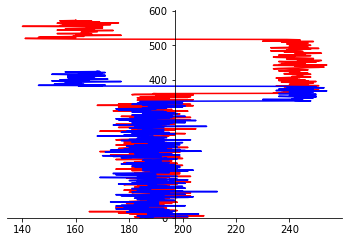

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = []
y =[]
j=0
# the function, which is y = x^2 here
for i in range(df.shape[0]):
    j+=1
    if (df['outcome'][i]==1):
        x.append(int(df['glucose'][i] )+ int(df['insulin'][i]))
y = [k for k in range(0, len(x))]
#     x.append(df['age'][i])

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

xx = []
yy =[]
j=0
# the function, which is y = x^2 here
for i in range(df.shape[0]):
    
    if (df['outcome'][i]==0):
        xx.append(int(df['glucose'][i] )+ int(df['insulin'][i]))
yy = [k for k in range(0, len(xx))]
# xx = []
# yy =[]
# for i in range(df.shape[0]):
#     j+=1
#     if (df['outcome'][i]==1):
#         yy.append(int(df['glucose'][i] )+ int(df['insulin'][i]))
# for i in range(df.shape[0]):
#     xx.append(df['outcome'][i]==1)
plt.plot(xx,yy, 'b')
# show the plot
plt.show()


In [14]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs

X = X[:, ::-1] # flip axes for better plotting
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

ModuleNotFoundError: No module named 'sklearn.datasets.samples_generator'

In [15]:
df['outcome'].value_counts()

0    52
1    48
Name: outcome, dtype: int64

0    23
Name: age, dtype: int64 Int64Index([], dtype='int64') 

1    21
Name: age, dtype: int64 Int64Index([], dtype='int64') 

2    23
Name: age, dtype: int64 Int64Index([], dtype='int64') 

3    13
Name: age, dtype: int64 Int64Index([], dtype='int64') 

4    22
Name: age, dtype: int64 Int64Index([], dtype='int64') 

5    19
Name: age, dtype: int64 Int64Index([], dtype='int64') 

6    15
Name: age, dtype: int64 Int64Index([], dtype='int64') 

7    17
Name: age, dtype: int64 Int64Index([], dtype='int64') 

8    20
Name: age, dtype: int64 Int64Index([], dtype='int64') 

9    19
Name: age, dtype: int64 Int64Index([], dtype='int64') 

10    15
Name: age, dtype: int64 Int64Index([], dtype='int64') 

11    18
Name: age, dtype: int64 Int64Index([], dtype='int64') 

12    19
Name: age, dtype: int64 Int64Index([], dtype='int64') 

13    17
Name: age, dtype: int64 Int64Index([], dtype='int64') 

14    18
Name: age, dtype: int64 Int64Index([], dtype='int64') 

15    24
Name: age, dtype: int64 In

## assign this outcome value to all tables

In [ ]:
tableList = [td1, td2, td3,  td5]

print("1")
for i in td2['PatientID'].unique():
    
    searchID = df[df['PatientID']== int(i)].index.values
    td2['outcome'][td2.index[td1['PatientID']== i]] = df['outcome'][max(searchID)]
print("1")
for i in td3['PatientID'].unique():
#     print (i)
    searchID = df[df['PatientID']== int(i)].index.values
    td3['outcome'][td3.index[td1['PatientID']== i]] = df['outcome'][max(searchID)]
print("1")
for i in td5['PatientID'].unique():
#     print (i)
    searchID = df[df['PatientID']== int(i)].index.values
    td5['outcome'][td5.index[td1['PatientID']== i]] = df['outcome'][max(searchID)]
print("1")
for i in td4['PatientID'].unique():
#     print (i)
    searchID = df[df['PatientID']== int(i)].index.values
    td4['outcome'][td4.index[td1['PatientID']== i]] = df['outcome'][max(searchID)]



## shuffle data in each table

In [33]:
tableList = [td1, td2, td3, td4, td5]
for table in tableList :
    table = table.sample(frac = 1)

## write all tables in csv

In [48]:
td1.to_csv("table1_wo.csv")
td2.to_csv("table2_wo.csv")
td3.to_csv("table3_wo.csv")
td4.to_csv("table4_wo.csv")
td5.to_csv("table5_wo.csv")

In [46]:
td1['outcome']=df['outcome']

### Visualise all tables 

In [ ]:
plt.figure()
sns.distplot(df['glucose'])

In [ ]:
plt.figure()
sns.distplot(df['insulin'])

In [ ]:
for i in td2.columns:
    if (i=='sex' or i=='PatientID'):
        continue
    else :
        plt.figure()
        sns.distplot(td2[i])

In [ ]:
for i in td4.columns:
    print(i)
    if (i=='sex' or i=='PatientID'):
        continue
    else :
        plt.figure()
        sns.distplot(td4[i])

In [ ]:
for i in td5.columns:
    if (i=='sex' or i=='PatientID'):
        continue
    else :
        plt.figure()
        sns.distplot(td5[i])

In [ ]:
df['outcome'].value_counts()

In [ ]:
categorical = ['vision', 'eye_color', 'sex', 'PatientID', 'age']
for i in full_df.columns:
    if (i in categorical):
        continue
    else :
        
        plt.figure()
        sns.distplot(full_df[i])

In [ ]:
fdf = df
from sklearn import linear_model
from sklearn.model_selection import train_test_split
regr = linear_model.LinearRegression()

from sklearn.preprocessing import LabelEncoder

sex_types = ('Male', 'Female')
eye_color_type =('amber', 'brown', )
vision_type = ('normal','blurred_vision','cataract','AMD')
eye_color_type = ('brown','hazel','blue','green','amber')
labelencoder = LabelEncoder()

y = fdf['outcome']
fdf = fdf.drop(["outcome", "sex", "vision", "eye_color", "blood_pressure","insulin", "cholestrol", "PatientID", "height", "flu", "pneumonia", "pregnancies"],axis=1)


X = fdf


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)


print(clf.score(X_test, y_test))


In [ ]:
fdf = df
from sklearn import linear_model
from sklearn.model_selection import train_test_split
regr = linear_model.LinearRegression()

from sklearn.preprocessing import LabelEncoder

sex_types = ('Male', 'Female')
eye_color_type =('amber', 'brown', )
vision_type = ('normal','blurred_vision','cataract','AMD')
eye_color_type = ('brown','hazel','blue','green','amber')
labelencoder = LabelEncoder()

y = fdf['outcome']
fdf = fdf.drop(["outcome", "sex", "vision", "eye_color"],axis=1)
X = fdf


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

print(clf.score(X_test, y_test))


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
# plt.scatter(X[:, 0], , c=labels, s=40, cmap='viridis');